<a href="https://colab.research.google.com/github/hahoyeah/dacon_ed/blob/main/%EB%B2%84%EC%8A%A42%26%EA%B3%BC%EC%A0%9C%ED%92%80%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 버스2

## 0.준비

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv]
!rm ~/.cache/matplotlib -rf
!pip install catboost

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
fc-cache: invalid option -- ']'
usage: fc-cache [-EfrsvVh] [-y SYSROOT] [--error-on-no-fonts] [--force|--really-force] [--sysroot=SYSROOT] [--system-only] [--verbose] [--version] [--help] [dirs]
Build font information caches in [dirs]
(all directories in font configuration by default).

  -E, --error-on-no-fonts  raise an error if no fonts in a directory
  -f, --force              scan directories with apparently valid caches
  -r, --really-force       erase all existing caches, then rescan
  -s, --system-only        scan system-wide directories only
  -y, --sysroot=SYSROOT    prepend SYSROOT to all paths for scanning
  -v, --verbose   

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

import folium

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/버스/train (1).csv')
test = pd.read_csv('/content/drive/MyDrive/버스/test (1).csv')
submission = pd.read_csv('/content/drive/MyDrive/버스/sample_submission (1).csv')

In [ ]:
train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38


# 과제

## 1) 가장 많은 버스가 다닌 상위 10개 정류장을 지도에 표시하기

In [ ]:
stations=train.value_counts('now_station')[:10].index
stations

Index(['남국원(아라방면)', '아라주공아파트', '도호동', '인다마을', '은남동', '제원아파트', '동문로터리',
       '제주여자중고등학교(아라방면)', '삼무공원사거리', '청소년문화의집'],
      dtype='object', name='now_station')

In [ ]:
locations=[]
for station in stations:
  locations.append(train[train['now_station']==station][['now_latitude','now_longitude']].iloc[0].values)

locations

[array([ 33.479705, 126.543811]),
 array([ 33.473655, 126.545425]),
 array([ 33.485662, 126.494923]),
 array([ 33.47145, 126.5454 ]),
 array([ 33.485822, 126.490897]),
 array([ 33.487531, 126.489892]),
 array([ 33.248683, 126.568347]),
 array([ 33.48486 , 126.542928]),
 array([ 33.4899  , 126.488917]),
 array([ 33.250433, 126.56505 ])]

In [ ]:
center = [33.35, 126.5]

In [ ]:
m=folium.Map(location=center, zoom_start=11, tiles='cartodbpositron')

for i, location in enumerate(locations):
    folium.Circle(
      radius=300,
      location=location,
      fill=True
  ).add_to(m)

m

## 2) 가장 많은 정류장을 경유한 버스의 경로를 지도에 표시하기

In [ ]:
train.value_counts('vh_id')

vh_id
7983038    3189
7983031    3164
7983074    2957
7983093    2840
7983097    2821
           ... 
7983000     410
7997077     248
7983401     228
7983051     216
7983403     114
Length: 104, dtype: int64

In [ ]:
locations=train[(train['vh_id']==7983038) & (train['date']=='2019-10-15')][['now_latitude','now_longitude']].values

m = folium.Map(location=center, zoom_start=11, tiles='cartodbpositron')


folium.PolyLine(locations=locations).add_to(m)

m

# EDA-Feature

In [ ]:
#일자는 겹치지읺가때문에 활용안해줘도 된다.

In [ ]:
train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38


In [ ]:
test

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,제대마을,07시,333.0,제대아파트,33.458783,126.557353
1,210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,제대아파트,07시,415.0,제주대학교,33.459893,126.561624
2,210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,한라중학교/부영아파트,08시,417.0,대림2차아파트,33.478850,126.488350
3,210460,2019-10-29,405136001,7997025,360-1,33.478850,126.488350,대림2차아파트,08시,334.0,연동대림1차아파트,33.480700,126.489933
4,210461,2019-10-29,405136001,7997025,360-1,33.480700,126.489933,연동대림1차아파트,08시,550.0,케이티앤지,33.482077,126.485355
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91769,302350,2019-11-05,405328102,7983486,281-2,33.493625,126.534764,제주지방법원(광양방면),20시,272.0,고산동산(광양방면),33.495540,126.532907
91770,302351,2019-11-05,405328102,7983486,281-2,33.495540,126.532907,고산동산(광양방면),20시,447.0,제주시청(광양방면),33.498925,126.530351
91771,302352,2019-11-05,405328102,7983486,281-2,33.498925,126.530351,제주시청(광양방면),20시,418.0,광양사거리,33.500473,126.527103
91772,302353,2019-11-05,405328102,7983486,281-2,33.500473,126.527103,광양사거리,20시,140.0,탐라장애인 종합복지관,33.500228,126.525625


In [ ]:
train[train['route_id']==405136001]['route_nm'].unique() #중복제거

array(['360-1'], dtype=object)

In [ ]:
train[train['route_nm']=='360-1']['route_id'].unique()

array([405136001])

In [ ]:
train[train['vh_id']==7997025]['route_id'].unique()

array([405136001])

- 서로 하나씩밖에 없기때문에 route_id	vh_id	route_nm	now 이중 하나만 사용해도된다.

가장 많은 데이터를 가지고 있는 vh_id를 사용

버스의 아이디만 알면 버스경로와 몇번인지를 알 수 있다.

루트넘버만알면 버스아이디를 알기는 어렵기 때문

In [ ]:
def check(text:str):
  if (len(train[train['vh_id'] == text]['route_id'].unique()) != 1) | (len(train[train['vh_id'] == text]['route_nm'].unique()) != 1):
    return True
  else :
    return False

In [ ]:
set(list(map(check, train['vh_id'].unique())))

{False}

## 2) gps features

In [ ]:
train[170:190]

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
170,170,2019-10-15,405136001,7997025,360-1,33.493109,126.535091,제주지방법원(아라방면),21시,525.0,제주중앙여자고등학교(아라방면),33.489414,126.538642,200
171,171,2019-10-15,405136001,7997025,360-1,33.489414,126.538642,제주중앙여자고등학교(아라방면),21시,642.0,제주여자중고등학교(아라방면),33.484860,126.542928,86
172,172,2019-10-15,405136001,7997025,360-1,33.484860,126.542928,제주여자중고등학교(아라방면),21시,578.0,남국원(아라방면),33.479705,126.543811,70
173,173,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),21시,355.0,아라초등학교,33.476533,126.544283,58
174,174,2019-10-15,405136001,7997025,360-1,33.476533,126.544283,아라초등학교,21시,350.0,아라주공아파트,33.473655,126.545425,104
175,175,2019-10-15,405136001,7997025,360-1,33.473655,126.545425,아라주공아파트,21시,244.0,인다마을,33.471450,126.545400,88
176,176,2019-10-15,405136001,7997025,360-1,33.471450,126.545400,인다마을,21시,330.0,제주대학교병원,33.469089,126.547389,34
177,177,2019-10-15,405136001,7997025,360-1,33.460496,126.549790,남국사,21시,591.0,제주대학교입구,33.456267,126.551750,134
178,178,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,21시,266.0,제대마을,33.457724,126.554014,30
179,179,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,21시,333.0,제대아파트,33.458783,126.557353,38


 ### 버스아이디에서 변화(바뀌는)하는 부분찾기(넘어가는 값 찾기)

In [ ]:
train['temp'] = train['vh_id'].shift(-1) # 한칸씩 당기기

train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,temp
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,7997025.0
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,7997025.0
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,7997025.0
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,7997025.0
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,7997025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96,7983486.0
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50,7983486.0
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16,7983486.0
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38,7983486.0


In [ ]:
train[170:190]

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,temp
170,170,2019-10-15,405136001,7997025,360-1,33.493109,126.535091,제주지방법원(아라방면),21시,525.0,제주중앙여자고등학교(아라방면),33.489414,126.538642,200,7997025.0
171,171,2019-10-15,405136001,7997025,360-1,33.489414,126.538642,제주중앙여자고등학교(아라방면),21시,642.0,제주여자중고등학교(아라방면),33.484860,126.542928,86,7997025.0
172,172,2019-10-15,405136001,7997025,360-1,33.484860,126.542928,제주여자중고등학교(아라방면),21시,578.0,남국원(아라방면),33.479705,126.543811,70,7997025.0
173,173,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),21시,355.0,아라초등학교,33.476533,126.544283,58,7997025.0
174,174,2019-10-15,405136001,7997025,360-1,33.476533,126.544283,아라초등학교,21시,350.0,아라주공아파트,33.473655,126.545425,104,7997025.0
175,175,2019-10-15,405136001,7997025,360-1,33.473655,126.545425,아라주공아파트,21시,244.0,인다마을,33.471450,126.545400,88,7997025.0
176,176,2019-10-15,405136001,7997025,360-1,33.471450,126.545400,인다마을,21시,330.0,제주대학교병원,33.469089,126.547389,34,7997025.0
177,177,2019-10-15,405136001,7997025,360-1,33.460496,126.549790,남국사,21시,591.0,제주대학교입구,33.456267,126.551750,134,7997025.0
178,178,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,21시,266.0,제대마을,33.457724,126.554014,30,7997025.0
179,179,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,21시,333.0,제대아파트,33.458783,126.557353,38,7997025.0


temp와 vh_id 중 다른 부분을 찾으면 된다.

In [ ]:
train[train['vh_id']!=train['temp']]['id'][:10]

180      180
380      380
538      538
716      716
901      901
1086    1086
1265    1265
1421    1421
1591    1591
1780    1780
Name: id, dtype: int64

In [ ]:
idx=[-1] #순서를 맞추기 위해

idx =idx + list(train[train['vh_id']!=train['temp']]['id'].values)

idx

[-1,
 180,
 380,
 538,
 716,
 901,
 1086,
 1265,
 1421,
 1591,
 1780,
 1838,
 2050,
 2227,
 2408,
 2567,
 2763,
 2967,
 3145,
 3361,
 3566,
 3599,
 3782,
 3977,
 4161,
 4360,
 4529,
 4719,
 4919,
 5079,
 5234,
 5398,
 5592,
 5787,
 5967,
 6144,
 6298,
 6449,
 6656,
 6841,
 7098,
 7273,
 7497,
 7665,
 7825,
 7935,
 8209,
 8472,
 8718,
 8940,
 9146,
 9283,
 9491,
 9653,
 9910,
 10139,
 10334,
 10522,
 10775,
 10984,
 11172,
 11327,
 11543,
 11729,
 11858,
 11946,
 12038,
 12109,
 12181,
 12293,
 12401,
 12487,
 12591,
 12677,
 12856,
 12860,
 13011,
 13146,
 13299,
 13461,
 13639,
 13806,
 13952,
 14117,
 14281,
 14464,
 14630,
 14777,
 14789,
 14823,
 14964,
 15087,
 15220,
 15390,
 15536,
 15667,
 15848,
 15979,
 16167,
 16343,
 16531,
 16724,
 16908,
 17092,
 17206,
 17388,
 17578,
 17635,
 17815,
 17976,
 18170,
 18269,
 18454,
 18673,
 18892,
 19099,
 19283,
 19472,
 19612,
 19746,
 19914,
 20067,
 20225,
 20410,
 20601,
 20745,
 20907,
 21059,
 21227,
 21347,
 21525,
 21723,
 21910

In [ ]:
train.loc[idx[2]:idx[3]]

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,temp
380,380,2019-10-15,405136001,7997034,360-1,33.458783,126.557353,제대아파트,21시,333.0,제대마을,33.457724,126.554014,128,7997035.0
381,381,2019-10-15,405136001,7997035,360-1,33.479705,126.543811,남국원(아라방면),07시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,7997035.0
382,382,2019-10-15,405136001,7997035,360-1,33.493109,126.535091,제주지방법원(아라방면),07시,414.0,고산동산(아라방면),33.496007,126.532287,144,7997035.0
383,383,2019-10-15,405136001,7997035,360-1,33.478867,126.483833,한라중학교/부영아파트,08시,417.0,대림2차아파트,33.478850,126.488350,116,7997035.0
384,384,2019-10-15,405136001,7997035,360-1,33.478850,126.488350,대림2차아파트,08시,334.0,연동대림1차아파트,33.480700,126.489933,42,7997035.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,534,2019-10-15,405136001,7997035,360-1,33.493109,126.535091,제주지방법원(아라방면),22시,525.0,제주중앙여자고등학교(아라방면),33.489414,126.538642,116,7997035.0
535,535,2019-10-15,405136001,7997035,360-1,33.489414,126.538642,제주중앙여자고등학교(아라방면),22시,642.0,제주여자중고등학교(아라방면),33.484860,126.542928,52,7997035.0
536,536,2019-10-15,405136001,7997035,360-1,33.484860,126.542928,제주여자중고등학교(아라방면),22시,578.0,남국원(아라방면),33.479705,126.543811,76,7997035.0
537,537,2019-10-15,405136001,7997035,360-1,33.456267,126.551750,제주대학교입구,22시,266.0,제대마을,33.457724,126.554014,20,7997035.0


In [ ]:
my_idx = 50

m = folium.Map(location=center, zoom_start=11, tiles='cartodbpositron')

locations = train.loc[idx[my_idx]+1 :idx[my_idx+1]][['next_latitude','next_longitude']].values

folium.PolyLine(locations=locations).add_to(m)

m

## 3) station

### a) 역 이름이 같은 좌표도 같을까?

In [ ]:
pd.DataFrame(train.groupby(['now_station','now_latitude']).count().reset_index()[:50].value_counts('now_station'))

,0
now_station,
911의원,2
고성리제주은행,2
구좌중앙초등학교,2
구좌보건지소,2
교래입구,2
광치기해변,2
광지동,2
광대왓,2
관덕정,2


피쳐 셀렉션 하는중


## b) 좌표로 역 이름을 알 수 있을까?


In [ ]:
def chech_station(text:str):
  if len(train[train['now_latitude']==text]['now_station'].unique()) != 1:
    return True
  else:
    return False

In [ ]:
temp = list(map(chech_station, train['now_latitude'].unique()))

set(temp)

{False, True}

In [ ]:
# 좌표로 역이름을 알 수 없는 애들

train['now_latitude'].unique()[temp]

array([33.275267, 33.274958, 33.4523  , 33.248487])

In [ ]:
train[train['now_latitude']==train['now_latitude'].unique()[temp][0]]

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,temp
6518,6518,2019-10-15,405320111,7983010,201-11,33.275267,126.703383,동부보건소,11시,295.0,남원취락구조,33.275155,126.700200,30,7983010.0
6645,6645,2019-10-15,405320111,7983010,201-11,33.275267,126.703383,동부보건소,21시,295.0,남원취락구조,33.275155,126.700200,34,7983010.0
6760,6760,2019-10-15,405320111,7983041,201-11,33.275267,126.703383,동부보건소,12시,295.0,남원취락구조,33.275155,126.700200,26,7983041.0
7071,7071,2019-10-15,405320111,7983097,201-11,33.275267,126.703383,동부보건소,20시,281.0,남원생활체육관,33.275718,126.706344,30,7983097.0
7125,7125,2019-10-15,405320112,7983005,201-12,33.275267,126.667067,뒤통모루,10시,332.0,상원동,33.275048,126.663532,50,7983005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206558,206558,2019-10-28,405320122,7983067,201-22,33.275267,126.667067,뒤통모루,15시,327.0,대원상동,33.274833,126.670583,40,7983067.0
206807,206807,2019-10-28,405320122,7983200,201-22,33.275267,126.667067,뒤통모루,21시,332.0,상원동,33.275048,126.663532,24,7983200.0
206824,206824,2019-10-28,405320124,7983013,201-24,33.275267,126.667067,뒤통모루,11시,332.0,상원동,33.275048,126.663532,22,7983013.0
206891,206891,2019-10-28,405320124,7983013,201-24,33.275267,126.667067,뒤통모루,22시,332.0,상원동,33.275048,126.663532,24,7983013.0


In [ ]:
def chech_station(text:str):
  if len(train[train['now_longitude']==text]['now_station'].unique()) != 1:
    return True
  else:
    return False 

In [ ]:
temp = list(map(chech_station, train['now_longitude'].unique()))

set(temp)

{False}

In [ ]:
# now_longitude을 알면 now_station을 알수있다. 결론!

#### c) 역이름은 같지만 좌표가 다른 경우 좌표별로 운행시간에 차이가 날까?

In [ ]:
train[train['now_latitude'] == train[train['now_station']=='911의원']['now_latitude'].unique()[0]]['next_arrive_time'].mean()

61.46067415730337

In [ ]:
train[train['now_latitude'] == train[train['now_station']=='911의원']['now_latitude'].unique()[1]]['next_arrive_time'].mean()

84.9041095890411

In [ ]:
train[train['now_latitude'] == train[train['now_station']=='고성리제주은행']['now_latitude'].unique()[0]]['next_arrive_time'].mean()

225.8507462686567

In [ ]:
train[train['now_latitude'] == train[train['now_station']=='고성리제주은행']['now_latitude'].unique()[1]]['next_arrive_time'].mean()

113.875

운행시간에 차이가 난다

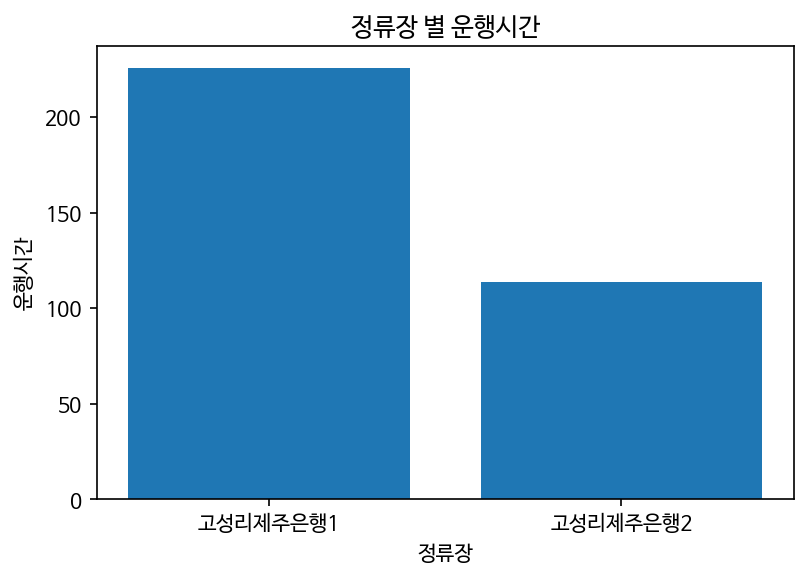

In [ ]:
x = ['고성리제주은행1', '고성리제주은행2']
y = [train[train['now_latitude'] == train[train['now_station'] == '고성리제주은행']['now_latitude'].unique()[0]]['next_arrive_time'].mean(),
     train[train['now_latitude'] == train[train['now_station'] == '고성리제주은행']['now_latitude'].unique()[1]]['next_arrive_time'].mean()]

plt.figure(dpi=150)

plt.title('정류장 별 운행시간')
plt.xlabel('정류장')
plt.ylabel('운행시간')

plt.bar(x,y)
plt.show()

### 4) now_arrive_time

In [ ]:
train['now_arrive_time'].value_counts().sort_index()

00시        5
05시      487
06시     8409
07시    13581
08시    13838
09시    13700
10시    13011
11시    12524
12시    13433
13시    13197
14시    12592
15시    12846
16시    13476
17시    13090
18시    12987
19시    13275
20시    11852
21시    11230
22시     6470
23시      454
Name: now_arrive_time, dtype: int64

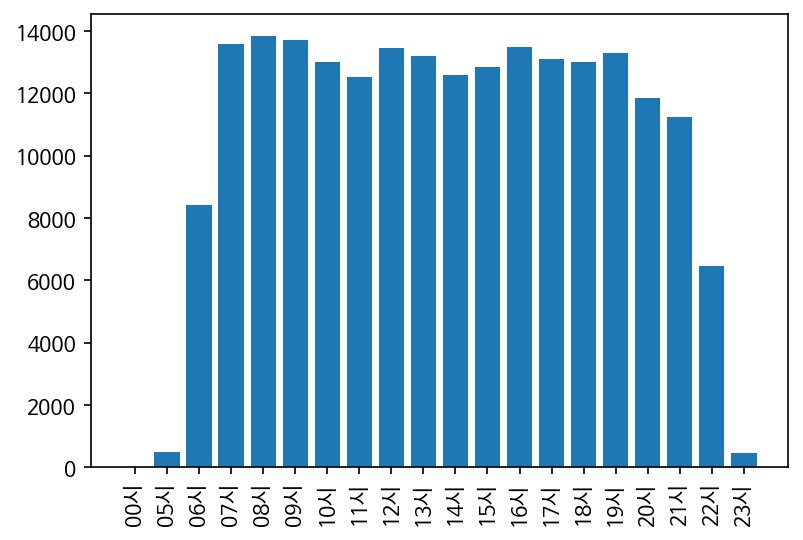

In [ ]:
x=train['now_arrive_time'].value_counts().sort_index().index
y=train['now_arrive_time'].value_counts().sort_index().values

plt.figure(dpi=150)
plt.xticks(rotation=90)

plt.bar(x,y)
plt.show()

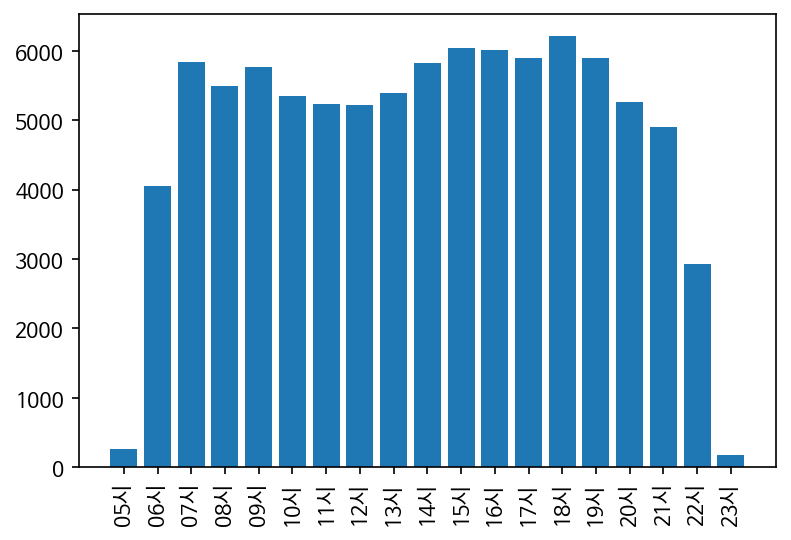

In [ ]:
x=test['now_arrive_time'].value_counts().sort_index().index
y=test['now_arrive_time'].value_counts().sort_index().values

plt.figure(dpi=150)
plt.xticks(rotation=90)

plt.bar(x,y)
plt.show()

In [ ]:
# 분포가 비슷하기때문에 별다른 조치를 취하지 않아도 된다.

### 5) distance

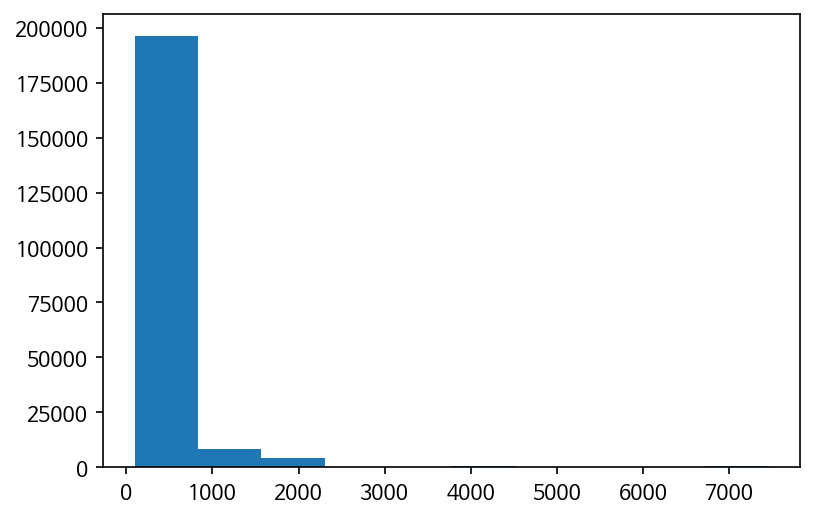

In [ ]:
plt.figure(dpi=150)

plt.hist(train['distance'])

plt.show()

In [ ]:
# 별다른 정보 못찾음

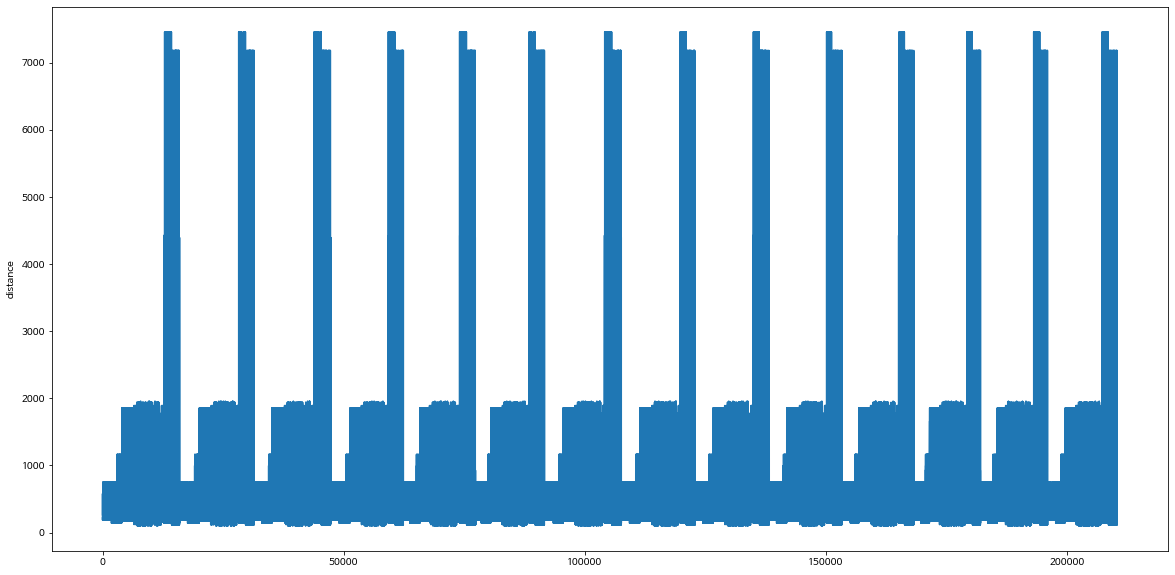

In [ ]:
train['distance'].plot(figsize=(20,10))
plt.ylabel('distance')
plt.show()

In [ ]:
# 산(한라산)을 넘어야하는 버스가 있어서 길이가 긴것이 있다

In [ ]:
train[train['distance']>6000]['now_station'].unique()

array(['성판악', '수악교'], dtype=object)

In [ ]:
train[train['distance']>6000]['next_station'].unique()

array(['수악교', '성판악'], dtype=object)

In [ ]:
locations = [train[train['distance']>6000][['now_latitude','now_longitude']].iloc[0].values]

In [ ]:
locations.append(train[train['distance']>6000][['next_latitude','next_longitude']].iloc[0].values)

In [ ]:
locations

[array([ 33.384634, 126.620353]), array([ 33.334694, 126.61037 ])]

In [ ]:
m = folium.Map(location=center, zoom_start=11)

folium.PolyLine(locations=locations).add_to(m)

m

In [ ]:
train[train['distance']>6000]['vh_id'].unique()

array([7983416, 7983417, 7983420, 7983431, 7983441, 7983481, 7983482,
       7983484, 7983400, 7983406, 7983409, 7983414, 7983415, 7983430,
       7983432, 7983439, 7983444, 7983445, 7983485, 7983486, 7983402,
       7983483, 7983412, 7983401])

In [ ]:
locations= train[(train['vh_id'] == train[train['distance'] > 6000]['vh_id'].unique()[3]) & (train['date'] == '2019-10-15')][['now_latitude',	'now_longitude']].values #unique()[3] 여기안의 숫자는 뭘 넣어도 비슷하네!

In [ ]:
m = folium.Map(location=center, zoom_start=11)

folium.PolyLine(locations=locations).add_to(m)

m

In [ ]:
train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,temp
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,7997025.0
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,7997025.0
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,7997025.0
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,7997025.0
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,7997025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96,7983486.0
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50,7983486.0
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16,7983486.0
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38,7983486.0


# 다른 모델 배워보자

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/버스/train (1).csv')
test = pd.read_csv('/content/drive/MyDrive/버스/test (1).csv')
submission = pd.read_csv('/content/drive/MyDrive/버스/sample_submission (1).csv')

In [ ]:
my_list = list(train['vh_id'].unique()) + list(train['now_longitude'].unique()) + list(train['next_longitude'].unique())

In [ ]:
my_dict = {text: i for i, text in enumerate(my_list)}

In [ ]:
train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38


In [ ]:
def transform_df(df:pd.DataFrame):
  df[['vh_id', 'now_longitude', 'next_longitude']] = df[['vh_id', 'now_longitude', 'next_longitude']].applymap(lambda x:my_dict[x])

  def text_to_time(text:str):
    return int(text[:2])

  df['now_arrive_time'] = df['now_arrive_time'].map(text_to_time)

  return df

In [ ]:
train = transform_df(train)
test = transform_df(test)

In [ ]:
train = train[train['next_arrive_time']<=1000]

In [ ]:
features = ['vh_id','now_longitude','now_arrive_time','distance','next_longitude']
target = 'next_arrive_time'

In [ ]:
X=train[features]
y=train[target]

## 2.Modeling

### 1) validation 셋 구축

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.1,shuffle=False)

In [ ]:
len(X_train), len(X_valid)

(189231, 21026)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train,y_train)

y_pred = model.predict(X_valid)

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(pred, real):
  return mean_squared_error(pred, real)**0.5

In [ ]:
def make_plot():
  RMSE = rmse(y_pred, y_valid)

  plt.figure(dpi=150)

  plt.title('RMSE : ' + str(RMSE)[:8])

  plt.plot(y_valid.reset_index(drop=True), alpha=0.6, label='real')
  plt.plot(y_pred, alpha=0.6, label='pred')

  plt.legend()
  plt.show()

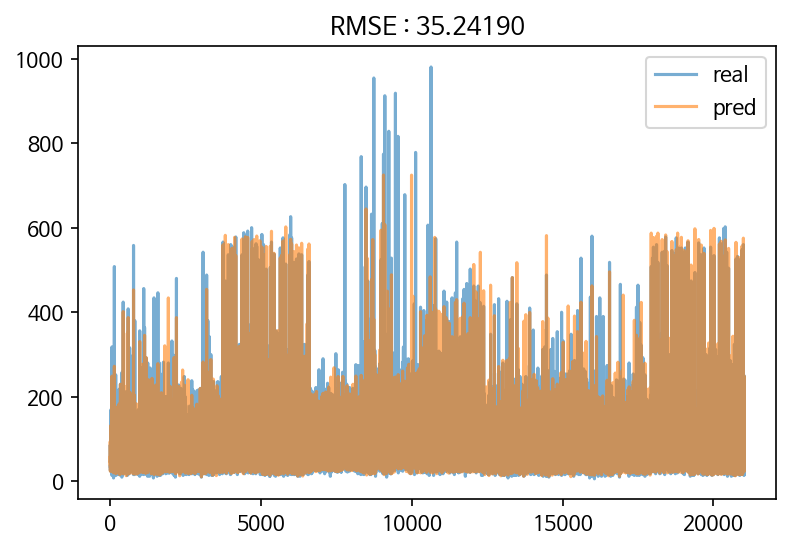

In [ ]:
make_plot()

### 2)xgb

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators = 3000, tree_method='gpu_hist')

model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)],
          eval_metric='rmse',
          early_stopping_rounds=10,
          verbose=5)

y_pred = model.predict(X_valid)

[0]	validation_0-rmse:95.3219
Will train until validation_0-rmse hasn't improved in 10 rounds.
[5]	validation_0-rmse:68.2565
[10]	validation_0-rmse:55.3815
[15]	validation_0-rmse:49.8475
[20]	validation_0-rmse:47.3265
[25]	validation_0-rmse:46.0695
[30]	validation_0-rmse:45.2887
[35]	validation_0-rmse:44.4669
[40]	validation_0-rmse:43.7149
[45]	validation_0-rmse:43.1887
[50]	validation_0-rmse:42.5501
[55]	validation_0-rmse:42.3398
[60]	validation_0-rmse:41.9109
[65]	validation_0-rmse:41.6858
[70]	validation_0-rmse:41.4197
[75]	validation_0-rmse:41.0868
[80]	validation_0-rmse:40.7737
[85]	validation_0-rmse:40.5006
[90]	validation_0-rmse:40.3133
[95]	validation_0-rmse:40.0851
[100]	validation_0-rmse:39.806
[105]	validation_0-rmse:39.6798
[110]	validation_0-rmse:39.3748
[115]	validation_0-rmse:39.2297
[120]	validation_0-rmse:39.0966
[125]	validation_0-rmse:38.9519
[130]	validation_0-rmse:38.7606
[135]	validation_0-rmse:38.6538
[140]	validation_0-rmse:38.5386
[145]	validation_0-rmse:38.424

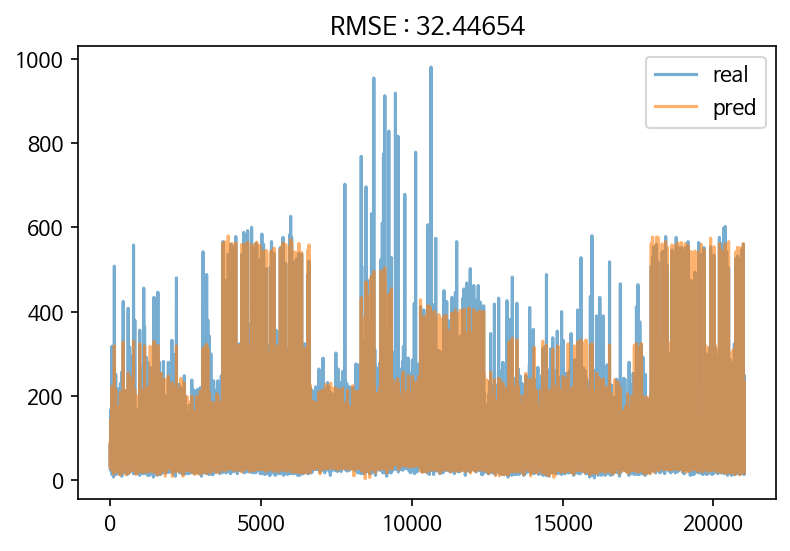

In [ ]:
make_plot()

## 캣부스트를 활용한 좀더 효율적인 인핫인코딩

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
X_train

,vh_id,now_longitude,now_arrive_time,distance,next_longitude
0,0,702,6,266.0,671
1,0,671,6,333.0,672
2,0,672,6,415.0,673
3,0,705,6,578.0,674
4,0,684,7,374.0,675
...,...,...,...,...,...
189407,47,1092,20,1070.0,1069
189408,47,1069,20,834.0,1119
189409,47,1119,20,571.0,805
189410,47,805,20,315.0,1094


In [ ]:
cat_features = [0,1,4]

model = CatBoostRegressor(n_estimators=3000,task_type='GPU')

model.fit(X_train, y_train,
          eval_set=(X_valid, y_valid),
          cat_features=cat_features,
          use_best_model=True,
          verbose=True)

y_pred = model.predict(X_valid)

Learning rate set to 0.079992
0:	learn: 63.1095020	test: 62.0037587	best: 62.0037587 (0)	total: 72.3ms	remaining: 3m 36s
1:	learn: 60.7422443	test: 59.4043390	best: 59.4043390 (1)	total: 199ms	remaining: 4m 57s
2:	learn: 58.6634622	test: 57.2416300	best: 57.2416300 (2)	total: 337ms	remaining: 5m 36s
3:	learn: 56.8747630	test: 55.4204221	best: 55.4204221 (3)	total: 475ms	remaining: 5m 56s
4:	learn: 55.2429951	test: 53.7670251	best: 53.7670251 (4)	total: 614ms	remaining: 6m 7s
5:	learn: 53.7630159	test: 52.2216118	best: 52.2216118 (5)	total: 734ms	remaining: 6m 6s
6:	learn: 52.4842189	test: 50.8807223	best: 50.8807223 (6)	total: 867ms	remaining: 6m 10s
7:	learn: 51.3213520	test: 49.6965873	best: 49.6965873 (7)	total: 992ms	remaining: 6m 11s
8:	learn: 50.3123601	test: 48.6236867	best: 48.6236867 (8)	total: 1.16s	remaining: 6m 24s
9:	learn: 49.4154985	test: 47.7019863	best: 47.7019863 (9)	total: 1.26s	remaining: 6m 18s
10:	learn: 48.6204282	test: 46.8952154	best: 46.8952154 (10)	total: 1.2

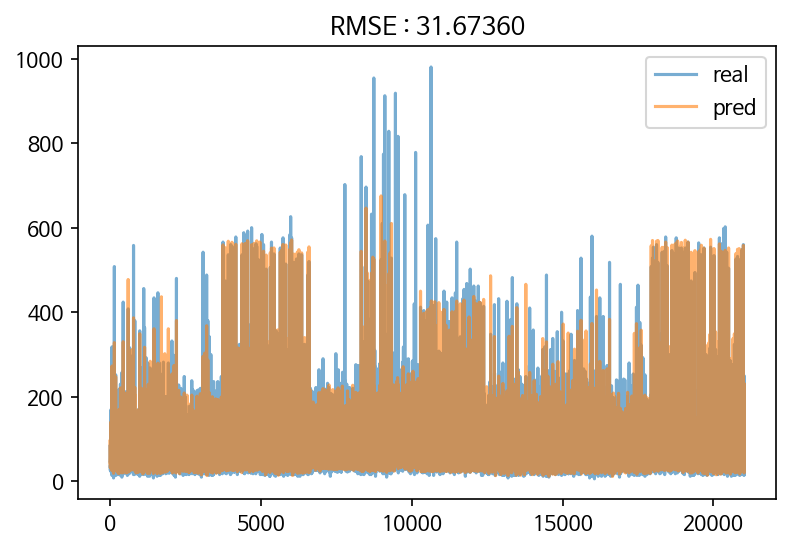

In [ ]:
make_plot()

In [ ]:
model = CatBoostRegressor(n_estimators=3000, task_type='GPU') 
#타입은 찾아보며 구해야한다 인터넷

model.fit(X_train, y_train,
          eval_set=(X_valid, y_valid),
          cat_features=cat_features,
          use_best_model=True,
          verbose=True)

y_pred = model.predict(test[features])

Learning rate set to 0.079992
0:	learn: 63.1095020	test: 62.0037587	best: 62.0037587 (0)	total: 81.7ms	remaining: 4m 5s
1:	learn: 60.7422443	test: 59.4043390	best: 59.4043390 (1)	total: 169ms	remaining: 4m 12s
2:	learn: 58.6634622	test: 57.2416300	best: 57.2416300 (2)	total: 267ms	remaining: 4m 27s
3:	learn: 56.8747630	test: 55.4204221	best: 55.4204221 (3)	total: 450ms	remaining: 5m 36s
4:	learn: 55.2429951	test: 53.7670251	best: 53.7670251 (4)	total: 610ms	remaining: 6m 5s
5:	learn: 53.7630159	test: 52.2216118	best: 52.2216118 (5)	total: 743ms	remaining: 6m 10s
6:	learn: 52.4842189	test: 50.8807223	best: 50.8807223 (6)	total: 869ms	remaining: 6m 11s
7:	learn: 51.3213520	test: 49.6965873	best: 49.6965873 (7)	total: 1s	remaining: 6m 15s
8:	learn: 50.3123601	test: 48.6236867	best: 48.6236867 (8)	total: 1.14s	remaining: 6m 19s
9:	learn: 49.4154985	test: 47.7019863	best: 47.7019863 (9)	total: 1.29s	remaining: 6m 24s
10:	learn: 48.6204282	test: 46.8952154	best: 46.8952154 (10)	total: 1.42s	

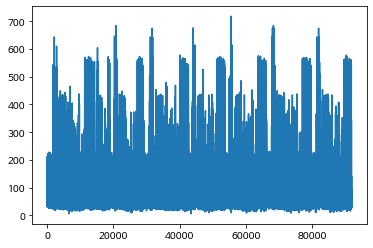

In [ ]:
plt.plot(y_pred)
plt.show()

In [ ]:
submission[target] = y_pred
submission.to_csv('submission.csv',index=False)

In [ ]:
# 학습횟수가 부족하다. 늘려야한다.

In [ ]:
# 켓부스트회귀부분 페러미터를 고치면서 점수를 올리자! #타입은 찾아보며 구해야한다 인터넷
# 피쳐엔지니어링 잘하자